In [ ]:
!pip install -q wandb

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [5]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 99% 329M/331M [00:09<00:00, 44.7MB/s]
100% 331M/331M [00:09<00:00, 38.1MB/s]


In [6]:
!unzip -qq utkface-new.zip

In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
# import wandb
# import wandb.keras
# from wandb.keras import (
#    WandbMetricsLogger,
#    WandbModelCheckpoint,
# )

In [ ]:
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

In [8]:
width = height = 224

In [9]:
images = []     # X
ages = []       # Y

for image_name in os.listdir("UTKFace"):
    parts = image_name.split('_')
    age = int(parts[0])
    ages.append(age)

    image = cv2.imread("UTKFace/" + image_name)
    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

In [10]:
images = pd.Series(images, name='Images')
ages = pd.Series(ages, name='Ages')

df = pd.concat([images, ages], axis=1)
df.head()

,Images,Ages
0,"[[[123, 117, 91], [108, 102, 76], [90, 83, 58]...",18
1,"[[[190, 159, 154], [187, 156, 151], [187, 156,...",82
2,"[[[168, 119, 61], [167, 118, 60], [166, 117, 5...",24
3,"[[[27, 44, 12], [28, 45, 13], [29, 45, 15], [3...",49
4,"[[[173, 160, 118], [173, 160, 118], [174, 159,...",6


82


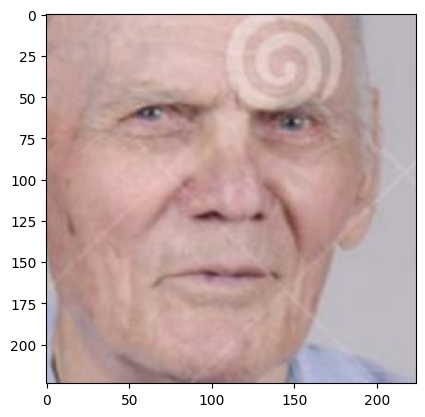

In [11]:
print(df["Ages"][1])
plt.imshow(df["Images"][1])
plt.show()

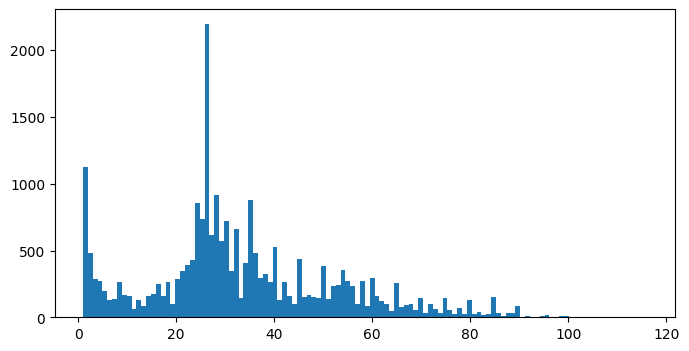

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [13]:
exactly_26 = df[df["Ages"].isin([26])]      # 26 year olds
exactly_26.head()

,Images,Ages
19,"[[[163, 124, 119], [164, 125, 120], [162, 124,...",26
36,"[[[23, 19, 16], [23, 19, 16], [21, 19, 15], [1...",26
37,"[[[21, 2, 0], [24, 4, 0], [26, 7, 1], [29, 10,...",26
55,"[[[51, 51, 51], [53, 53, 53], [55, 55, 55], [5...",26
56,"[[[1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], ...",26


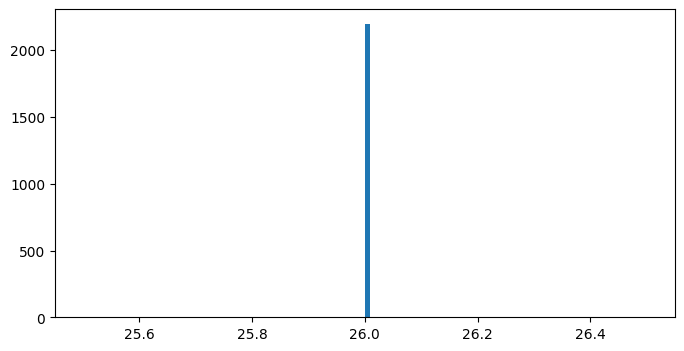

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(exactly_26["Ages"], bins=df["Ages"].max())
plt.show()

In [15]:
under_26 = df[df["Ages"] < 26]
over_26 = df[df["Ages"] > 26]

exactly_26 = exactly_26.sample(frac=0.3)    # keep 0.3 of 26 year olds

df = pd.concat([under_26, exactly_26, over_26], axis=0)

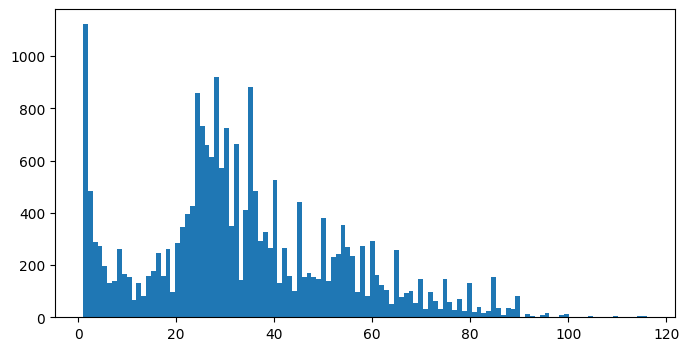

In [16]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [17]:
del exactly_26
del under_26
del over_26

In [18]:
ages_22to30 = df[(df['Ages']>=22) & (df['Ages']<= 30 )]

under_22 = df[df["Ages"] < 22]
over_30 = df[df["Ages"] > 30]
ages_22to30 = ages_22to30.sample(frac=0.3)

df = pd.concat([under_22, ages_22to30, over_30], axis=0)

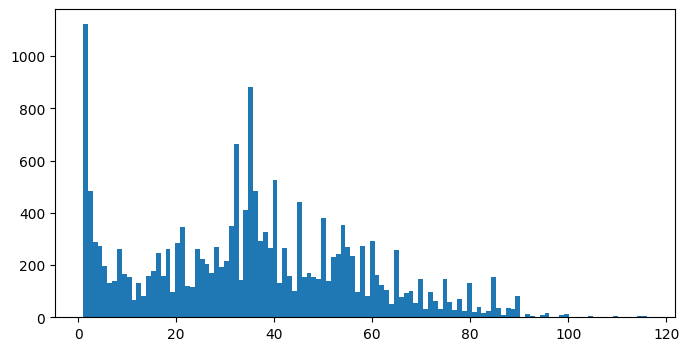

In [19]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [20]:
del ages_22to30
del under_22
del over_30

In [21]:
ages_35to40 = df[(df['Ages']>=35) & (df['Ages']<= 40)]

under_35 = df[df["Ages"] < 35]
over_40 = df[df["Ages"] > 40]
ages_35to40 = ages_35to40.sample(frac=0.5)

df = pd.concat([under_35, ages_35to40, over_40], axis=0)

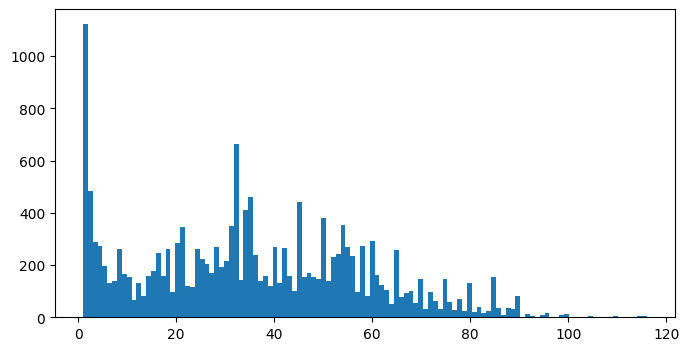

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [23]:
del ages_35to40
del under_35
del over_40

In [24]:
under_4 = df[df["Ages"] < 4]    # 1 year olds
over_4 = df[df["Ages"] >= 4]    # others

under_4 = under_4.sample(frac=0.2)      # keep 0.2 of 1 year olds
df = pd.concat([under_4, over_4], axis=0)

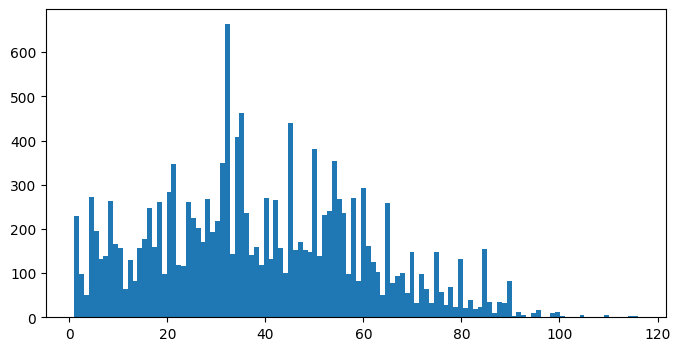

In [25]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [26]:
del under_4
del over_4

In [28]:
df = df[df['Ages'] <= 70]

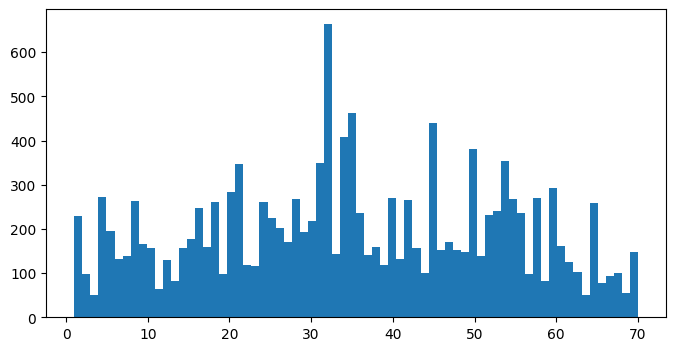

In [29]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [30]:
exactly_32 = df[df["Ages"].isin([32])]      # 32 year olds

under_32 = df[df["Ages"] < 32]
over_32 = df[df["Ages"] > 32]

exactly_32 = exactly_32.sample(frac=0.5)    # keep 0.5 of 32 year olds

df = pd.concat([under_32, exactly_32, over_32], axis=0)

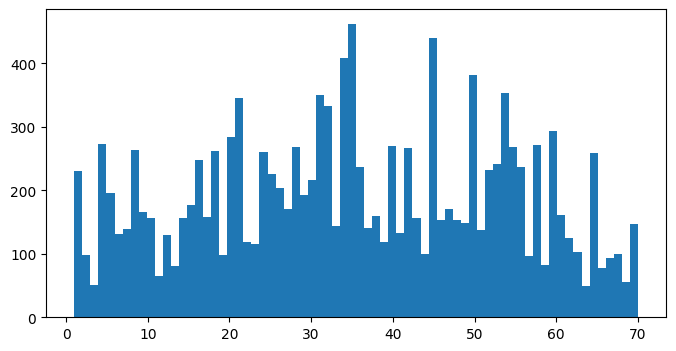

In [31]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [32]:
df = df.sample(frac=0.5)

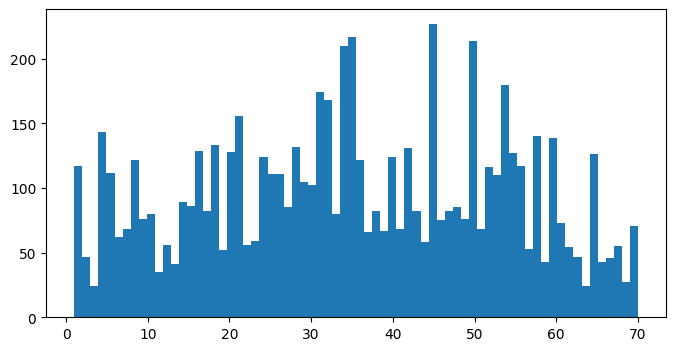

In [33]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [34]:
# convert from pandas dataframe to numpy array

X = np.array(df["Images"].values.tolist())
Y = np.array(df["Ages"].values.tolist())

In [35]:
del images
del ages

In [36]:
X.shape

(6790, 224, 224, 3)

In [37]:
Y.shape

(6790,)

In [38]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2)

In [39]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(5432, 224, 224, 3)
(1358, 224, 224, 3)
(5432,)
(1358,)


In [40]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    # horizontal_flip=True
)

train_data = image_data_generator.flow(
    X_train,
    Y_train,
    batch_size=32,
    shuffle=True
)

validation_data = image_data_generator.flow(
    X_validation,
    Y_validation,
    batch_size=16,
    shuffle=False
)

In [41]:
del X
del Y
del df

In [ ]:
run = wandb.init(project="age_prediction")

In [ ]:
config = wandb.config

In [ ]:
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models.keras"),
]

## create model

In [42]:
base_model = tf.keras.applications.EfficientNetV2M(
    include_top=False,
    weights="imagenet",     #Transfer Learning
    input_shape=(width, height, 3),
    pooling="avg"
)

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [43]:
for layer in base_model.layers:
    layer.trainable=False       #freeze🧊

In [44]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

In [45]:
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [ ]:
history = model.fit(train_data,
          validation_data=validation_data,
          epochs=40)
        #   callbacks=wandb_callbacks)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  9/170 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - loss: 1778.3901

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-session55/age_prediction.h5")
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-session55/age_prediction.keras")